# Problem 1: Birthday Paradox

To design a program that can test the [Birthday problem](https://en.wikipedia.org/wiki/Birthday_problem), by a series of experiments, on randomly generated birthdays which test this paradox for n = 5,10,15,20,25,30...200.

**Step 1: Theoritical probability of at least two of the n persons having the same birthday can be calculated as follows:**

In [1]:
def ProbabilityTheoritical(n):
    p= 1 - Factorial(365)/((365**n)*Factorial(365-n))
    """Reference: wikipedia"""
    return p

def Factorial(m):
    fac=1
    for i in range(1,m+1):
        fac= fac*i
    return fac

**Step 2: Experimental probability for n person. Taking n persons over and over again and check the probability**

In [2]:
import random

def ProbabilityExperimental(n):
    yescount=0
    lst=[]
    """To calculate experimental probability we need to repeat the experiment over and over again."""
    """so lets repeat it for 10,000 times for each value of n"""
    for i in range(10000): 
        for j in range(n):
            """First lets generate n random birthdays.
            Each no. from 1 to 365 will represent a birthday, so we can select n random nos. from 1 to 365"""
            lst.append(random.randint(1,366))

        """Now check is their any pair with same birthday"""
        if(len(set(lst))<len(lst)):
            yescount +=1
        lst.clear()

    p=yescount/10000
    return p

**Step 3: Now lets calculate the theoritical and experimental value of the probabibility of at least two of the n persons having the same birthday, taking n= 5,10,15,20,25,30...200.**

In [3]:
y1=[]
y2=[]

falsecount=0
truecount=0

for n in range(5,205,5):
    a=ProbabilityTheoritical(n)
    b=ProbabilityExperimental(n)
    
    # y-axis for plotting the probability vs number of people graph
    y1.append(a)
    y2.append(b)
    
    # comparing theoritical and experimental probabilties
    if a-b<0.02:
        print("n = {}".format(n).ljust(7), "True".rjust(8),"     Theoritical prob ≈ {}".format(a).ljust(48),"Experimental prob ≈ {}".format(b))
        truecount+=1
        
    else:
        print("n = {}".format(n).ljust(7), "False".rjust(8),"     Theoritical prob ≈ {}".format(a).ljust(48),"Experimental prob ≈ {}".format(b))    
        falsecount+=1

        
print("\nTrue count:",truecount)
print("False count:",falsecount)

if (falsecount==0):
    print("Since the false count is 0, so the Birthday Paradox is true.")

elif (falsecount<=5):
    print("Since the false count is so low, so the Birthday Paradox is true.")

else:
    print("Since the false count is more than 5, so the Birthday Paradox is false.\n")

n = 5       True      Theoritical prob ≈ 0.02713557369979358      Experimental prob ≈ 0.0285
n = 10      True      Theoritical prob ≈ 0.11694817771107768      Experimental prob ≈ 0.1121
n = 15      True      Theoritical prob ≈ 0.25290131976368635      Experimental prob ≈ 0.2488
n = 20      True      Theoritical prob ≈ 0.41143838358057994      Experimental prob ≈ 0.415
n = 25      True      Theoritical prob ≈ 0.5686997039694639       Experimental prob ≈ 0.5729
n = 30      True      Theoritical prob ≈ 0.7063162427192686       Experimental prob ≈ 0.7072
n = 35      True      Theoritical prob ≈ 0.8143832388747152       Experimental prob ≈ 0.8112
n = 40      True      Theoritical prob ≈ 0.891231809817949        Experimental prob ≈ 0.8939
n = 45      True      Theoritical prob ≈ 0.940975899465775        Experimental prob ≈ 0.9405
n = 50      True      Theoritical prob ≈ 0.9703735795779884       Experimental prob ≈ 0.9695
n = 55      True      Theoritical prob ≈ 0.9862622888164461       Exper

**Note:**

In [ ]:
# True: Theoritical probability ≈ Experimental probabilbilty
# False: Theoritical probability ≠ Experimental probabilbilty
# These are approximate values of the probabilities, since the probability will be exact 1 only when no. of persons n >= 367

"""
From above values we may conclude that:
- If there are 23 person in a room, the probabilty that atleast 2 of them have same birthday is 50%
- If there are only 70 person in a room, the probabilty that atleast 2 of them have same birthday is 99.9%

These conclusions are based on the assumption that each day of the year (excluding February 29) is equally probable 
for a birthday."""

**Step 4: Plotting (Probability of a pair sharing a birthday) vs (Number of people):**

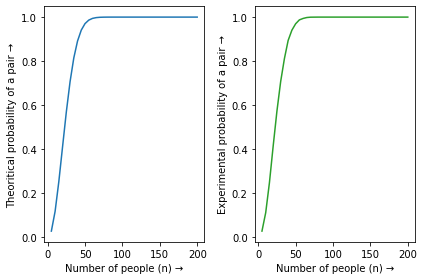

In [4]:
import matplotlib.pyplot as plt

# x-axis scale
x=[]
for i in range(5,205, 5):
    x.append(i)


# plotting the theoritical probability of at least two people sharing a birthday vs the number of people
plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.xlabel('Number of people (n) →')
plt.ylabel('Theoritical probability of a pair →')


# plotting the experimental probability of at least two people sharing a birthday vs the number of people
plt.subplot(1, 2, 2)
plt.plot(x, y2, color ='tab:green')
plt.xlabel('Number of people (n) →')
plt.ylabel('Experimental probability of a pair →')


#printing the therotical and experimental plots side by side
plt.tight_layout()
plt.show()